code-2.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
np.random.seed(55)
npoint = 6
theta = np.pi/4
r = 0.9

npoint = 15
iter = 0
iter_points = {}

iter_max = 50

def generate_points(low,high, npoint):
    x_coordinates = np.random.uniform(low, high, npoint)
    y_coordinates = np.random.uniform(low, high, npoint)
    points = np.column_stack((x_coordinates, y_coordinates))
    return points

def objective_function(x,y):
    z = (x-10)**2 +(y-5)**2
    return z

iter_points[iter] = generate_points(-10,10,npoint)
iter_points

{0: array([[-8.13783427,  7.97171446],
        [ 9.4331184 ,  9.71223164],
        [-0.32280039, -0.06510155],
        [-5.14954597, -2.95362148],
        [ 0.6224766 ,  7.34169989],
        [-4.28911529, -2.06236509],
        [ 7.25260754,  2.87314438],
        [-9.17799693, -9.59093374],
        [-7.83304532,  6.16169086],
        [ 5.34320091, -1.40773396],
        [-8.97142582,  1.17093045],
        [ 5.51433077,  5.5822258 ],
        [-9.81722115, -1.94885753],
        [ 2.36624227,  8.15989836],
        [ 6.37418665,  2.99939222]])}

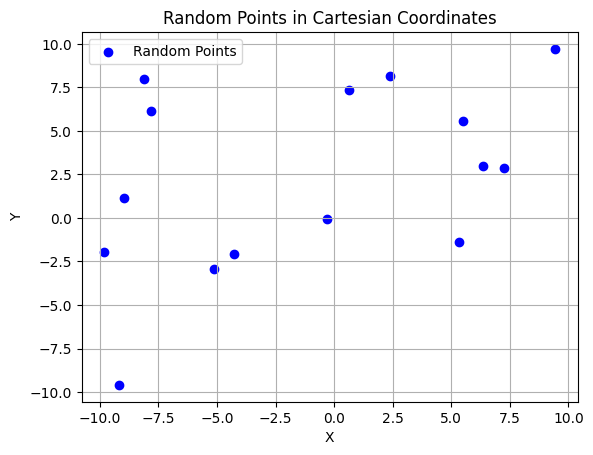

In [2]:
# Plot the points
plt.scatter(iter_points[0][:,0], iter_points[0][:,1], c='b', marker='o', label='Random Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points in Cartesian Coordinates')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [3]:
R2 = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])
S2 = r*R2

def minimize(set_of_points):
    z = []
    z_min = 10**100
    for i in range (len(set_of_points)):
        z.append(objective_function(set_of_points[i,0],set_of_points[i,1]))
        if z[i]<z_min:
            z_min = z[i]
            idx_min = i
    x_min = set_of_points[idx_min]
    return z_min,idx_min,x_min

def update_point(set_of_points):
    (z_star,idx_star,x_star) = minimize(set_of_points)
    new_set_of_points = np.copy(set_of_points)
    for i in range (len(new_set_of_points)):
        poin = np.dot(S2,set_of_points[i].reshape(-1,1)) - np.dot((S2-np.identity(2)),x_star.reshape(-1,1))
        new_set_of_points[i] = poin.T
    return new_set_of_points

while iter <= iter_max:
    iter_points[iter+1] = update_point(iter_points[iter])
    iter += 1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.grid(True)
# ax.plot()
ax.autoscale()

# Initialize an empty scatter plot (it will be updated in the animation)
sc = ax.scatter([], [])

points = iter_points[0]
sc.set_offsets(points)

# Define an initialization function
def init():
    return sc,

# Define the update function for the animation
def update(frame, points):
    points = iter_points[frame]
    sc.set_offsets(points)
    ax.autoscale_view()
    return sc,

# Create the animation and pass points as an argument to the update function
ani = FuncAnimation(fig, update, frames=iter_max, init_func=init, fargs=(points,), blit=True)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Animation of Arbitrary Number of Points')

# Close the previous figure
plt.close()

# Display the animation as HTML
display(HTML(ani.to_jshtml()))


Save Animation

In [ ]:
save = False
if save == True:
    gif_filename = 'animation.gif'
    ani.save(gif_filename, writer='pillow', fps=300)